In [33]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import numpy as np

#Parte 1
##a)


In [34]:
data = load_digits()
digits = data.data
target = data.target
target_names = data.target_names
from sklearn.datasets import load_digits

n_samples = len(data.images) #digits.shape[0]

n_features = digits.shape[1]

n_classes = len(target_names)

image_height = data.images.shape[1]
image_width = data.images.shape[2]

print("Número de muestras:", n_samples)
print("Número de características:", n_features)
print("Número de clases:", n_classes)
print(f"Tamaño de las imágenes en píxeles: {image_height}x{image_width} = {image_height * image_width}")


Número de muestras: 1797
Número de características: 64
Número de clases: 10
Tamaño de las imágenes en píxeles: 8x8 = 64


##b)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    digits, target, test_size=0.25, stratify = target, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##c)

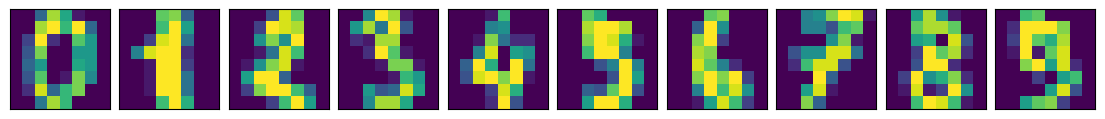

In [36]:
fig, ax = plt.subplots(1, 10, figsize=(14,2),
                       subplot_kw={'xticks':[],'yticks':[]},
                       gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i in range(10):
  ax[i].imshow(data.images[i].reshape(8,8)) #no es necesario usar reshape, lo dejo porque me parece interesante saber que se puede usar
                                            #también se puede usar cmap='binary_r' para que los datos se grafiquen en blanco y negro.
#El factor de forma original es 8x8

plt.show()

#Parte 2
##d)

In [37]:
parameters = {'n_neighbors' : [2,3,4,5,6,7,8,9,10]}
knn_classifier = KNeighborsClassifier() #Metrica de distancia default: Minkoswski, valor de p default: 2 =>
                                        # => La metrica de distancia default es la euclidiana (L2)
print("La metrica de distancia usada por default es la Euclidiana (L2)")

k_folds = 10
grid = GridSearchCV(
    estimator = knn_classifier, param_grid = parameters, cv = k_folds
)

grid.fit(X_train, y_train)

#Al elegir k = 10 para hacer el k-fold cross validation estoy dividiendo el conjunto de entrenamiento en 10 conjuntos mas
#pequeños de igual tamaño entre ellos, por lo que el tamaño de los conjuntos de validación resulta el tamaño del test de
#entrenamiento dividido 10.
print(f"El tamaño de los conjuntos de los conjuntos de validación es {X_train.shape[0] // k_folds}") #Hago división entera

La metrica de distancia usada por default es la Euclidiana (L2)
El tamaño de los conjuntos de los conjuntos de validación es 134


##e)

El número optimo de vecinos es: {'n_neighbors': 5}
accuracy = 0.9791984521835267  (mean_test_score)


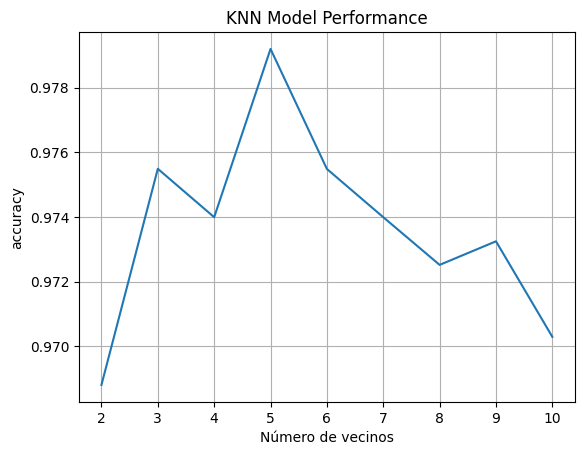

In [38]:
scores = grid.cv_results_['mean_test_score']

plt.plot(parameters['n_neighbors'], scores)
plt.xlabel('Número de vecinos')
plt.ylabel('accuracy')
plt.title('KNN Model Performance')

print(f"El número optimo de vecinos es: {grid.best_params_}")
print('accuracy =', grid.best_score_, ' (mean_test_score)')

plt.grid()
plt.show()

##f)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.94      1.00      0.97        46
           2       0.96      1.00      0.98        44
           3       0.98      0.98      0.98        46
           4       0.98      0.93      0.95        45
           5       0.98      0.96      0.97        46
           6       0.98      0.98      0.98        45
           7       0.92      0.98      0.95        45
           8       0.97      0.91      0.94        43
           9       0.95      0.91      0.93        45

    accuracy                           0.96       450
   macro avg       0.97      0.96      0.96       450
weighted avg       0.97      0.96      0.96       450



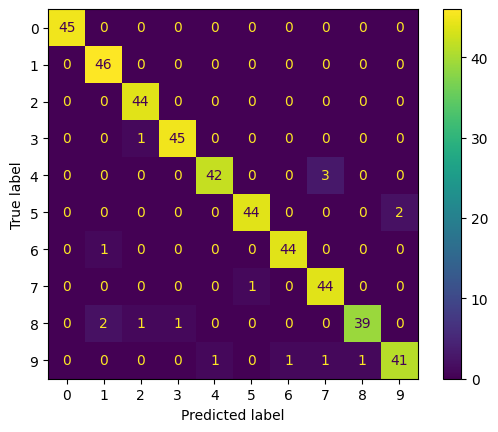

In [39]:
model = KNeighborsClassifier(n_neighbors = 5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names = [str(name) for name in target_names]))

labels = target_names
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

Teniendo en cuenta donde hay mas de 1 error, se puede ver que se confunde el 1 con el 8 (dos veces), el 9 con el 5 (dos veces) y el 7 con el 4 (tres veces). El accuracy sobre el set de test (0.96) coincide casi 100% con el mejor accuracy encontrado en la búsqueda en grilla (~0.98). Se puede concluir que el modelo no sufre overfitting, ya que el rendimiento(performance) del set de entrenamiento se puede generalizar al set de prueba. Si hubiese overfitting esto no podria hacerse, la performance de mi set de entrenamiento seria casi perfecta mientras que la performance del set de prueba no seria ifual de buena.

#Parte 3
##g)

In [40]:
pca = PCA(n_components=30)
X_pca = pca.fit(X_train).fit_transform(X_train)

variance_ratio = np.array(pca.explained_variance_ratio_)
cumsum = np.cumsum(variance_ratio)

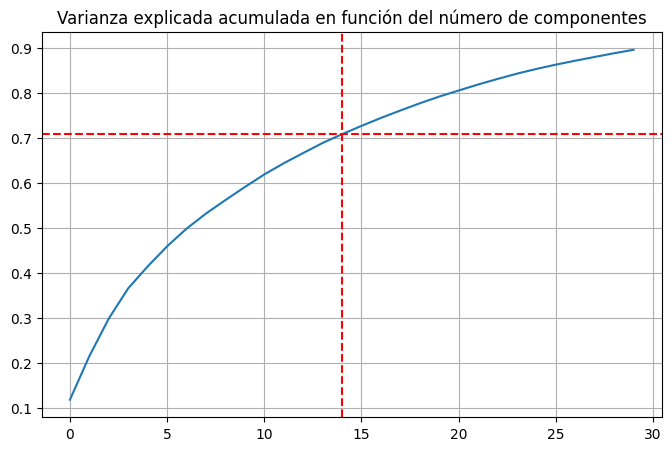

In [41]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.plot(cumsum)

ax.axhline(y=cumsum[14], color='red', linestyle='--')
ax.axvline(x=14, color='red', linestyle='--')
plt.title("Varianza explicada acumulada en función del número de componentes")
ax.grid()
plt.show()

##h)

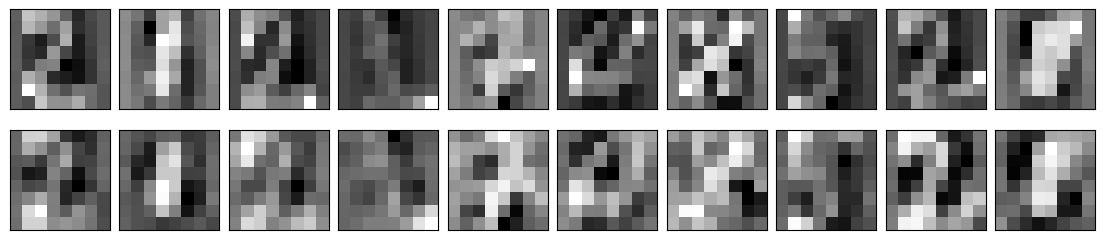

In [42]:
pca = PCA(n_components=14)
X_pca = pca.fit(X_train).fit_transform(X_train)

X_train_reconstruido = X_pca @ pca.components_ + pca.mean_

fig, ax = plt.subplots(2, 10, figsize=(14,3),
                       subplot_kw={'xticks':[],'yticks':[]},
                       gridspec_kw=dict(hspace=0.1,wspace=0.1))

for j in range(2):
  for i in range(10):
    if j == 0:
      ax[j][i].imshow(X_train[i].reshape(8,8), cmap='binary_r')
    else:
      ax[j][i].imshow(X_train_reconstruido[i].reshape(8,8), cmap='binary_r')
plt.show()

##i)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.90      0.98      0.94        46
           2       0.93      0.98      0.96        44
           3       0.96      0.98      0.97        46
           4       1.00      0.96      0.98        45
           5       0.96      0.93      0.95        46
           6       0.98      0.98      0.98        45
           7       0.91      0.96      0.93        45
           8       0.97      0.88      0.93        43
           9       0.93      0.91      0.92        45

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



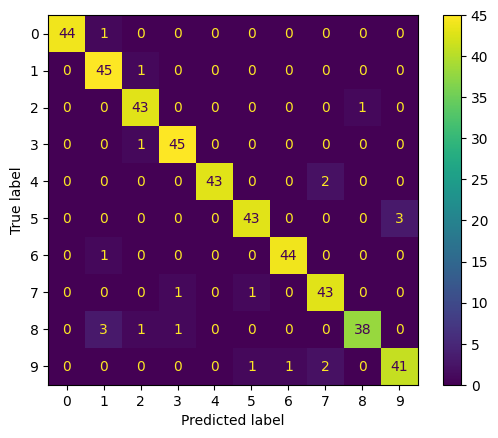

In [43]:
model = KNeighborsClassifier(n_neighbors = 5)

model.fit(X_pca, y_train)

reduced_X_test = pca.transform(X_test)[:, :14]

y_pred = model.predict(reduced_X_test)

print(classification_report(y_test, y_pred, target_names = [str(name) for name in target_names]))

labels = target_names
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

Se puede ver que obtenemos resultados casi los mismos resultados del item (f) aplicando PCA y entrenando al modelo KNN solo con los 14 componentes mas relevantes de los datos. Concluyo de esto que puede ser muy conveniente aplicar PCA para reducir la dimensionalidad de los datos y asi ahorrar tiempo y recursos al correr mi modelo sobre los datos reducidos.

#Parte 4
##j)

In [44]:
R = np.random.normal(digits,2) #Aclaro que digits ya es la data (digits.data en el enunciado del ejercicio)

#Vuelvo a generar mis set de test y entrenamiento para los datos con ruido
X_train, X_test, y_train, y_test = train_test_split(
    R, target, test_size=0.25, stratify = target, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Lo que hace el script np.random.normal(digits,2) es crear un arreglo $R$ de las mismas dimensiones que digits con cada elemento siendo un numero aleatorio generado por una distribucion normal con media igual a su contraparte en digits y varianza $2$. Es decir, sea $d_{\text{}ij}$ el elemento en la fila $i$-ésima y columna $j$-ésima de digits. El elemento en la fila $i$-ésima y columna $j$-ésima de $R$, $r_{\text{}ij}$ va a ser un número aleatorio generado por una distribución normal con media igual a $d_{\text{}ij}$ y varianza $2$. El tipo de ruido que se agrego a las imágenes es uno normal con varianza $2$.


##k)

In [45]:
pca = PCA(n_components=30)
X_pca = pca.fit(X_train).fit_transform(X_train)

variance_ratio = np.array(pca.explained_variance_ratio_)
cumsum = np.cumsum(variance_ratio)

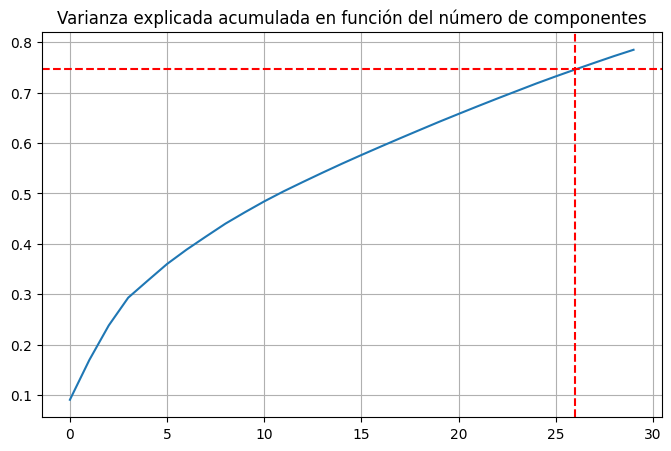

In [46]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.plot(cumsum)

ax.axhline(y=cumsum[26], color='red', linestyle='--')
ax.axvline(x=26, color='red', linestyle='--')
plt.title("Varianza explicada acumulada en función del número de componentes")
ax.grid()
plt.show()

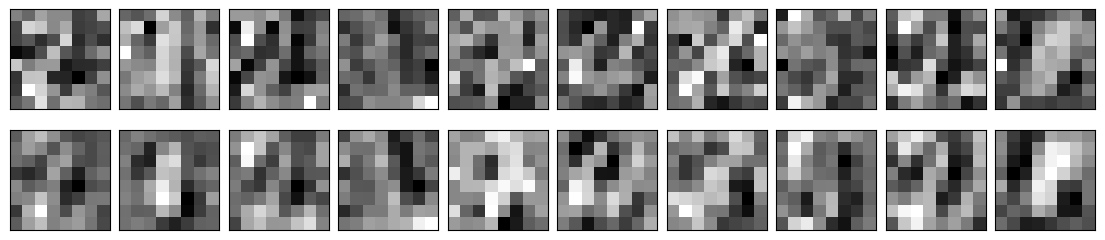

In [47]:
pca = PCA(n_components=14)
X_pca = pca.fit(X_train).fit_transform(X_train)

X_train_reconstruido = X_pca @ pca.components_ + pca.mean_

fig, ax = plt.subplots(2, 10, figsize=(14,3),
                       subplot_kw={'xticks':[],'yticks':[]},
                       gridspec_kw=dict(hspace=0.1,wspace=0.1))

for j in range(2):
  for i in range(10):
    if j == 0:
      ax[j][i].imshow(X_train[i].reshape(8,8), cmap='binary_r')
    else:
      ax[j][i].imshow(X_train_reconstruido[i].reshape(8,8), cmap='binary_r')
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       0.88      0.98      0.93        46
           2       0.96      1.00      0.98        44
           3       1.00      0.96      0.98        46
           4       0.98      0.98      0.98        45
           5       0.94      0.98      0.96        46
           6       1.00      0.98      0.99        45
           7       0.90      1.00      0.95        45
           8       0.92      0.81      0.86        43
           9       0.97      0.82      0.89        45

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



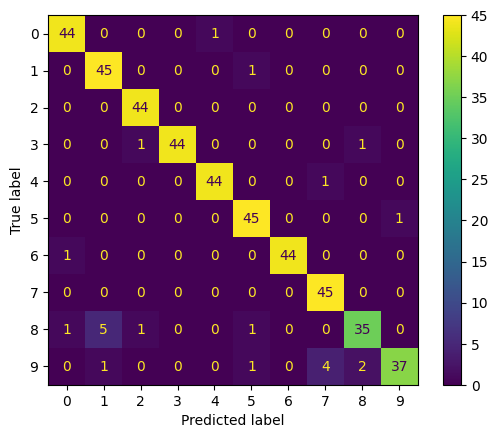

In [48]:
model = KNeighborsClassifier(n_neighbors = 5)

model.fit(X_pca, y_train)

reduced_X_test = pca.transform(X_test)[:, :14]

y_pred = model.predict(reduced_X_test)

print(classification_report(y_test, y_pred, target_names = [str(name) for name in target_names]))

labels = target_names
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

##l) Conclusión
Se puede ver que la performance del clasificador KNN aplicado a los datos con ruido casi no disminuye comparada con la del mismo clasificador aplicado a los datos sin ruido si usamos PCA. Esto me sugiere que PCA siempre obtiene las cualidades mas importantes de los datos, sin importar que estos tengan ruido o no. \\
A pesar de que al trabajar con datos con ruido se necesitan mas componentes para explicar cierto nivel de varianza que los que necesitariamos para explicar el mismo nivel de varianza en los datos sin ruido, se puede ver que usando la misma cantidad de componentes (14), el accuracy del clasificador pasa de 0.96 sin ruido a 0.95 con ruido. Por lo que PCA hace un gran trabajo.